In [9]:
import matplotlib.pyplot as plt
import xarray as xr

import common

In [2]:
# July 11 @ 6Z
for_plot = xr.open_dataset("fig_data/physics_transect.nc")
date = for_plot.time.values.item()

In [3]:
gscond_dcloud = for_plot["tendency_of_cloud_water_due_to_gscond_physics"]
gscond_dcloud = common.kg_kg_s_to_g_kg_day(gscond_dcloud)
gscond_dcloud["pressure"] = gscond_dcloud["pressure"] / 100


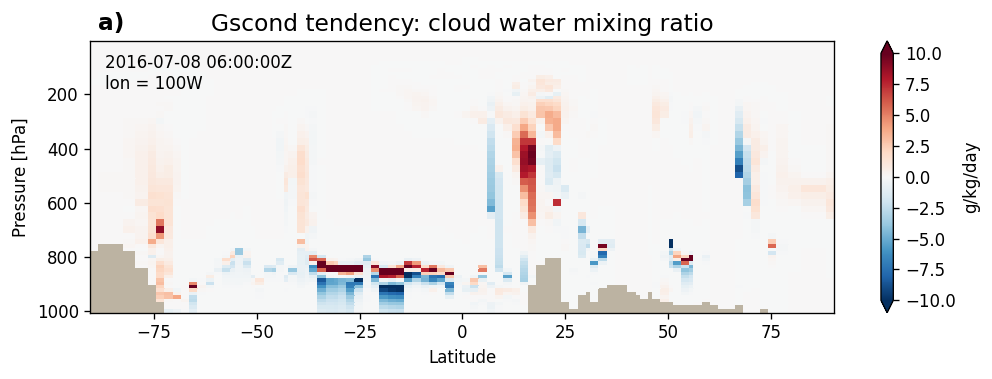

In [6]:

fig, ax = plt.subplots(dpi=120, figsize=(10, 3))
gscond_dcloud.plot(vmin=-10, vmax=10, cmap=common.RdBu_LAND, yincrease=False, cbar_kwargs=dict(label="g/kg/day"))
plt.ylabel("Pressure [hPa]")
plt.xlabel("Latitude")
plt.text(0.01, 1.04, "a)", fontdict=dict(size=14, weight="bold"), transform=ax.transAxes)
plt.text(0.02, 0.95, f"{date.strftime()}Z\nlon = 100W", transform=ax.transAxes, va="top")
plt.title("Gscond tendency: cloud water mixing ratio", size=14)
common.savefig("gscond-transect-a")
plt.show()

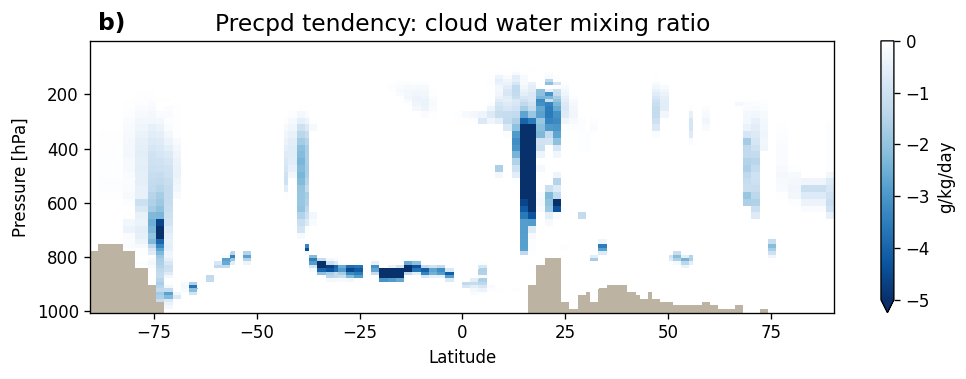

In [7]:
precpd_dcloud = for_plot["tendency_of_cloud_water_due_to_zhao_carr_physics"] - for_plot["tendency_of_cloud_water_due_to_gscond_physics"]
precpd_dcloud = common.kg_kg_s_to_g_kg_day(precpd_dcloud)
precpd_dcloud["pressure"] = precpd_dcloud["pressure"] / 100

fig, ax = plt.subplots(dpi=120, figsize=(10, 3))
precpd_dcloud.plot(vmin=-5, vmax=0, cmap=common.NuBlues_LAND, yincrease=False, cbar_kwargs=dict(label="g/kg/day"))
plt.ylabel("Pressure [hPa]")
plt.xlabel("Latitude")
plt.title("Precpd tendency: cloud water mixing ratio", size=14)
plt.text(0.01, 1.04, "b)", fontdict=dict(size=14, weight="bold"), transform=ax.transAxes)
common.savefig("precpd-transect-b")
plt.show()


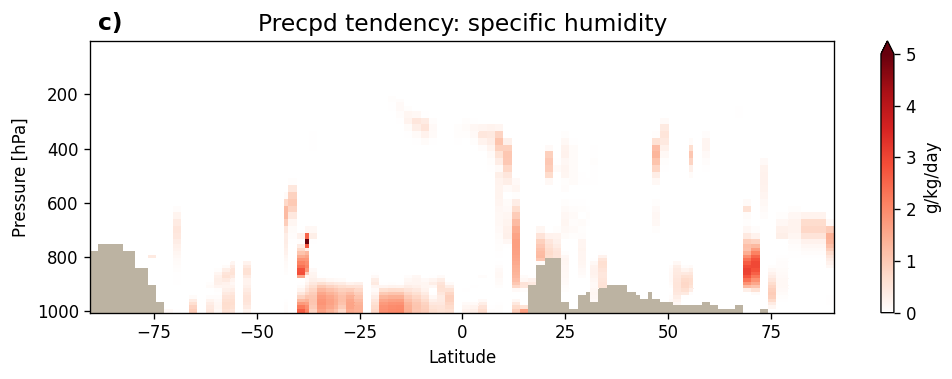

In [8]:

precpd_dhumidity = for_plot["tendency_of_specific_humidity_due_to_zhao_carr_physics"] - for_plot["tendency_of_specific_humidity_due_to_gscond_physics"]
precpd_dhumidity = common.kg_kg_s_to_g_kg_day(precpd_dhumidity)
precpd_dhumidity["pressure"] = precpd_dhumidity["pressure"] / 100

fig, ax = plt.subplots(dpi=120, figsize=(10, 3))
precpd_dhumidity.plot(vmin=0, vmax=5, cmap=common.NuReds_LAND, yincrease=False, cbar_kwargs=dict(label="g/kg/day"))
plt.ylabel("Pressure [hPa]")
plt.xlabel("Latitude")
plt.title("Precpd tendency: specific humidity", size=14)
plt.text(0.01, 1.04, "c)", fontdict=dict(size=14, weight="bold"), transform=ax.transAxes)
common.savefig("precpd-transect-c")
plt.show()